<a id = "1"></a>
#### Import Data

* First look at data
* We must read our csv files from directory

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
data_dir = "D:/work/ATMEC-Medical-Project-/disease-from-symptoms/Dataset"
train_df = pd.read_csv(data_dir + "/Training.csv")
test_df = pd.read_csv(data_dir + "/Testing.csv")
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


There are 4920 samples and 134 features in the dataset. First we have to dive into deeper of the data so we can completely understand it. The data is clean and balanced so we dont need to handle with missing values, outliers etc. Just one column will be dropped below stages of this kernel

In [4]:
# display 30-60. indices of columns. 
train_df.columns[30:60]

Index(['indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
       'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine',
       'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload',
       'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise',
       'blurred_and_distorted_vision', 'phlegm', 'throat_irritation',
       'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion',
       'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',
       'pain_during_bowel_movements'],
      dtype='object')

In [5]:
# all of these are encoded data and types are integer.
train_df["indigestion"]

0       0
1       0
2       0
3       0
4       0
       ..
4915    0
4916    0
4917    0
4918    0
4919    0
Name: indigestion, Length: 4920, dtype: int64

In [6]:
train_df["prognosis"].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [7]:

# features = ['indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea',
#        'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
#        'abdominal_pain', 'diarrhoea', 'mild_fever']


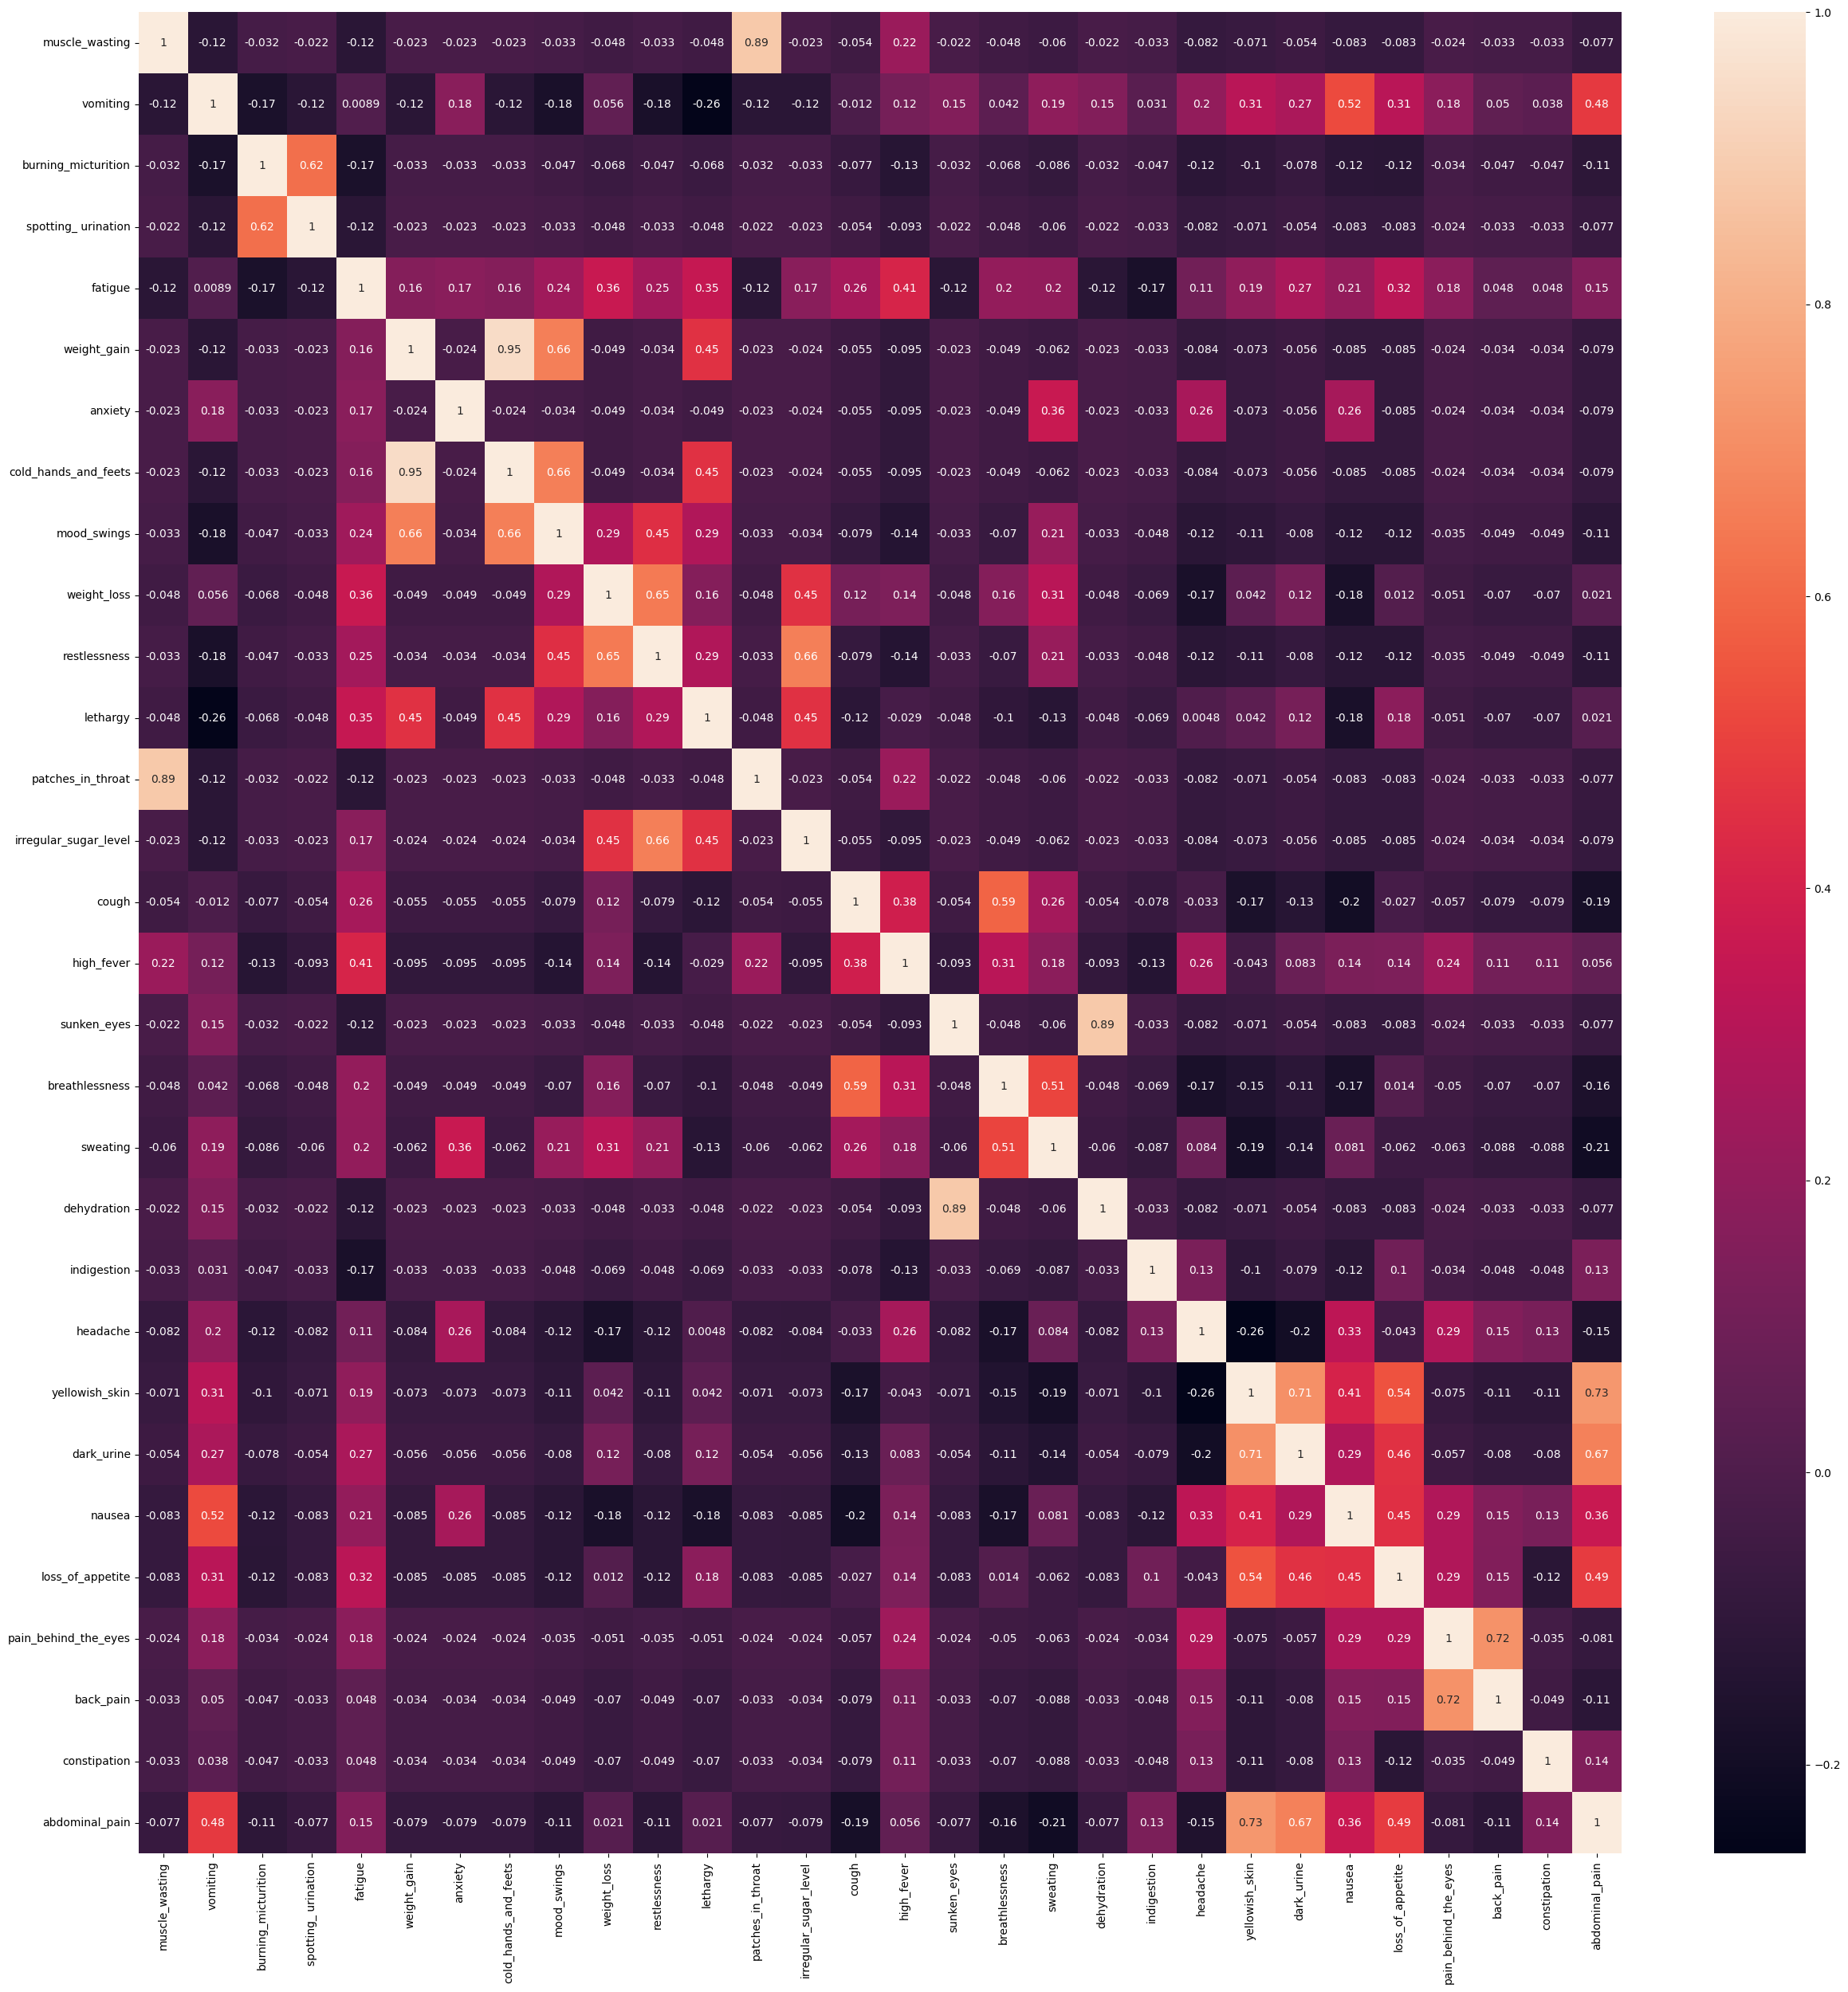

In [8]:
# linear relationships between some of features using correlation heatmap: for example which symptoms occur together?
df_corr = train_df.iloc[:, 10:40]
plt.figure(figsize = (30, 30))
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

as we look at from correlation map, we can infer these:
* yellowish skin and abdominal pain have a high correlation coefficent which means these features usually seem together (maybe a liver problem)
* cough and breathlessness also have high correlation (it's usual because lung diseases give the same symptoms)
* restlessness and irregular sugar usually seem together

<a id = "2"></a>
#### Data Cleaning

In [9]:
# drop unnamed feature from train data
train_df.drop("Unnamed: 133", axis = 1, inplace = True)
# train_df["Unnamed: 133"]  # it's not here anymore

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [11]:
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


OK. Now let's create our ML models
<a id = "3"></a>
### KNN

In [13]:
# !pip install scikit-learn

^C



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# Modelling
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  # k = 5
x_train, y_train = train_df.loc[:,train_df.columns != "prognosis"], train_df.loc[:,"prognosis"]
x_test, y_test = test_df.loc[:,train_df.columns != "prognosis"], test_df.loc[:,"prognosis"]
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("Prediction list: {}".format(prediction[0:20]))
print("With KNN (K=5) accuracy is: ",knn.score(x_test, y_test))

Prediction list: ['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A']
With KNN (K=5) accuracy is:  1.0


In fact, this dataset doesnt requires tuning, but I want to try basics of complex modelling

In [15]:
import pickle

# Save the model to disk
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

In [19]:
columns = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech', 'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'swelling_joints', 'movement_stiffness', 'spinning_movements', 'loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching', 'toxic_look_(typhos)', 'depression', 'irritability', 'muscle_pain', 'altered_sensorium', 'red_spots_over_body', 'belly_pain', 'abnormal_menstruation', 'dischromic _patches', 'watering_from_eyes', 'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum', 'lack_of_concentration', 'visual_disturbances', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'blood_in_sputum', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister', 'red_sore_around_nose', 'yellow_crust_ooze']
print(len(columns))

132


In [20]:
def predict_disease(symptoms):
    # Load the model
    with open('knn_model.pkl', 'rb') as file:
        loaded_model = pickle.load(file)
    
    # Create a feature vector of zeros
    feature_vector = pd.DataFrame(np.zeros((1, len(columns))), columns=columns)
    
    # Set 1 for each symptom that is present
    for symptom in symptoms:
        if symptom in feature_vector.columns:
            feature_vector[symptom] = 1
    
    # Make prediction
    prediction = loaded_model.predict(feature_vector)
    return prediction[0]

# Example usage
symptoms_list = ['headache', 'nausea', 'loss_of_appetite']
predicted_disease = predict_disease(symptoms_list)
print(f"Predicted Disease: {predicted_disease}")

Predicted Disease: Paralysis (brain hemorrhage)
